# DA Mini Project
* 주제 : 온라인 학습 플랫폼 사용자 행동 패턴 분석
* 개요 :
```
이번 프로젝트는 학습 서비스를 이용하는 독자들 중 누가 서비스 구독을 연장할지 예측하기 위한 사전 파악에 초점을 맞추고 있습니다. 우리의 목표는 유저들의 학습 습관, 선호도, 이용 행태 등 다양한 측면을 면밀히 분석하는 것입니다.


이를 위해, 우리는 유저들의 학습 패턴, 서비스 이용 시간, 콘텐츠에 대한 반응, 그리고 이들이 얼마나 자주 서비스를 이용하는지 등 다양한 데이터를 수집하고 분석할 계획입니다. 이 데이터는 유저들이 서비스에 얼마나 만족하고 있는지, 어떤 요소들이 그들의 구독 결정에 영향을 미치는지 이해하는 데 중요한 역할을 할 것입니다.
```
* 데이터셋 : mini.csv
    * 메타데이터
        * user_id: 사용자의 고유 식별자
        * subscription_duration: 사용자가 서비스에 가입한 기간 (월)
        * recent_login_time: 사용자가 마지막으로 로그인한 시간 (일)
        * average_login_time:  사용자의 일반적인 로그인 시간
        * average_time_per_learning_session: 각 학습 세션에 소요된 평균 시간 (분)
        * monthly_active_learning_days: 월간 활동적인 학습 일수
        * total_completed_courses: 완료한 총 코스 수
        * recent_learning_achievement: 최근 학습 성취도
        * abandoned_learning_sessions: 중단된 학습 세션 수
        * community_engagement_level: 커뮤니티 참여도
        * preferred_difficulty_level: 선호하는 난이도
        * subscription_type: 구독 유형
        * customer_inquiry_history: 고객 문의 이력
        * payment_pattern : 사용자의 지난 3개월 간의 결제 패턴을 10진수로 표현한 값.
          - 7: 3개월 모두 결제함
          - 6: 첫 2개월은 결제했으나 마지막 달에는 결제하지 않음
          - 5: 첫 달과 마지막 달에 결제함
          - 4: 첫 달에만 결제함
          - 3: 마지막 2개월에 결제함
          - 2: 가운데 달에만 결제함
          - 1: 마지막 달에만 결제함
          - 0: 3개월 동안 결제하지 않음

In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('C:\workspace\python\data/data/mini.csv', sep=',')
df

,user_id,subscription_duration,recent_login_time,average_login_time,average_time_per_learning_session,monthly_active_learning_days,total_completed_courses,recent_learning_achievement,abandoned_learning_sessions,community_engagement_level,preferred_difficulty_level,subscription_type,customer_inquiry_history,payment_pattern,target
0,b919c29d,13,14,14.946163,8.427187,18,16,68.360455,3,4,Low,Basic,4,5,0
1,a0a60abb,16,18,18.453224,72.646087,16,13,97.567322,2,3,Medium,Basic,1,6,1
2,b9f171ae,22,1,16.195228,21.774492,13,14,94.358763,3,4,Medium,Premium,0,7,1
3,5dc0ba8b,1,19,17.628656,42.659066,19,18,70.153228,0,3,Low,Basic,1,0,1
4,65c83654,4,5,21.390656,30.744287,19,10,81.917908,2,4,Medium,Basic,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,ae6b76bc,22,29,14.727623,84.053558,18,16,64.966803,2,5,Low,Premium,1,1,1
9996,24588752,10,11,19.374054,45.464833,9,8,82.750244,3,3,Medium,Basic,2,7,1
9997,e4622a54,7,27,18.240978,127.302411,24,14,81.567839,3,5,High,Basic,1,6,1
9998,e07fbad9,11,7,18.783800,5.297234,10,10,89.885656,4,5,Low,Basic,2,0,1


In [3]:
df.rename(columns={'user_id': '사용자 ID', 'subscription_duration': '서비스 가입 기간 (월)', 'recent_login_time': '마지막으로 로그인한 시간 (일)', 'average_login_time': '평균 로그인 시간', 'average_time_per_learning_session': '학습에 소요된 평균 시간 (분)', 'monthly_active_learning_days': '월간 활동 학습 일수', 'total_completed_courses': '완료한 총 코스 수', 'recent_learning_achievement': '최근 학습 성취도', 'abandoned_learning_sessions': '중단된 학습 세션 수', 'community_engagement_level': '커뮤니티 참여도', 'preferred_difficulty_level': '선호하는 난이도', 'subscription_type': '구독 유형', 'customer_inquiry_history': '고객 문의 이력', 'payment_pattern': '결제 패턴', 'target': '타겟'}, inplace=True)

In [4]:
df

,사용자 ID,서비스 가입 기간 (월),마지막으로 로그인한 시간 (일),평균 로그인 시간,학습에 소요된 평균 시간 (분),월간 활동 학습 일수,완료한 총 코스 수,최근 학습 성취도,중단된 학습 세션 수,커뮤니티 참여도,선호하는 난이도,구독 유형,고객 문의 이력,결제 패턴,타겟
0,b919c29d,13,14,14.946163,8.427187,18,16,68.360455,3,4,Low,Basic,4,5,0
1,a0a60abb,16,18,18.453224,72.646087,16,13,97.567322,2,3,Medium,Basic,1,6,1
2,b9f171ae,22,1,16.195228,21.774492,13,14,94.358763,3,4,Medium,Premium,0,7,1
3,5dc0ba8b,1,19,17.628656,42.659066,19,18,70.153228,0,3,Low,Basic,1,0,1
4,65c83654,4,5,21.390656,30.744287,19,10,81.917908,2,4,Medium,Basic,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,ae6b76bc,22,29,14.727623,84.053558,18,16,64.966803,2,5,Low,Premium,1,1,1
9996,24588752,10,11,19.374054,45.464833,9,8,82.750244,3,3,Medium,Basic,2,7,1
9997,e4622a54,7,27,18.240978,127.302411,24,14,81.567839,3,5,High,Basic,1,6,1
9998,e07fbad9,11,7,18.783800,5.297234,10,10,89.885656,4,5,Low,Basic,2,0,1


In [5]:
df['평균 로그인 시간'] = df['평균 로그인 시간'].round(0).astype(int)
df['학습에 소요된 평균 시간 (분)'] = df['학습에 소요된 평균 시간 (분)'].round(0).astype(int)
df['최근 학습 성취도'] = df['최근 학습 성취도'].round(0).astype(int)

In [6]:
df

,사용자 ID,서비스 가입 기간 (월),마지막으로 로그인한 시간 (일),평균 로그인 시간,학습에 소요된 평균 시간 (분),월간 활동 학습 일수,완료한 총 코스 수,최근 학습 성취도,중단된 학습 세션 수,커뮤니티 참여도,선호하는 난이도,구독 유형,고객 문의 이력,결제 패턴,타겟
0,b919c29d,13,14,15,8,18,16,68,3,4,Low,Basic,4,5,0
1,a0a60abb,16,18,18,73,16,13,98,2,3,Medium,Basic,1,6,1
2,b9f171ae,22,1,16,22,13,14,94,3,4,Medium,Premium,0,7,1
3,5dc0ba8b,1,19,18,43,19,18,70,0,3,Low,Basic,1,0,1
4,65c83654,4,5,21,31,19,10,82,2,4,Medium,Basic,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,ae6b76bc,22,29,15,84,18,16,65,2,5,Low,Premium,1,1,1
9996,24588752,10,11,19,45,9,8,83,3,3,Medium,Basic,2,7,1
9997,e4622a54,7,27,18,127,24,14,82,3,5,High,Basic,1,6,1
9998,e07fbad9,11,7,19,5,10,10,90,4,5,Low,Basic,2,0,1


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   사용자 ID             10000 non-null  object
 1   서비스 가입 기간 (월)      10000 non-null  int64 
 2   마지막으로 로그인한 시간 (일)  10000 non-null  int64 
 3   평균 로그인 시간          10000 non-null  int32 
 4   학습에 소요된 평균 시간 (분)  10000 non-null  int32 
 5   월간 활동 학습 일수        10000 non-null  int64 
 6   완료한 총 코스 수         10000 non-null  int64 
 7   최근 학습 성취도          10000 non-null  int32 
 8   중단된 학습 세션 수        10000 non-null  int64 
 9   커뮤니티 참여도           10000 non-null  int64 
 10  선호하는 난이도           10000 non-null  object
 11  구독 유형              10000 non-null  object
 12  고객 문의 이력           10000 non-null  int64 
 13  결제 패턴              10000 non-null  int64 
 14  타겟                 10000 non-null  int64 
dtypes: int32(3), int64(9), object(3)
memory usage: 1.0+ MB


## 가설

1. subscription_duration과 recent_login_time: 구독 기간이 길면서 최근에도 로그인한 사용자는 구독을 연장할 가능성이 있다
2. average_time_per_learning_session과 monthly_active_learning_days: 평균 학습 세션 시간이 길고, 월간 활동적인 학습 일수가 많은 사용자는 학습에 대한 높은 흥미를 보여주므로 구독 연장 가능성이 있다
3. total_completed_courses와 recent_learning_achievement: 완료한 총 코스 수와 최근 학습 성취도가 높은 사용자는 학습에 대한 목표 달성과 성과를 보여주므로 구독 연장 가능성이 있다
4. abandoned_learning_sessions와 community_engagement_level: 중단된 학습 세션 수가 적고, 커뮤니티 참여도가 높은 사용자는 학습에 대한 지속적인 관심과 사회적 참여를 보여주므로 구독 연장 가능성이 있다
5. preferred_difficulty_level과 subscription_type: 선호하는 난이도와 구독 유형은 사용자의 학습 선호도와 요구사항을 반영하므로, 이를 고려하여 구독 연장 가능성을 예측할 수 있다

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

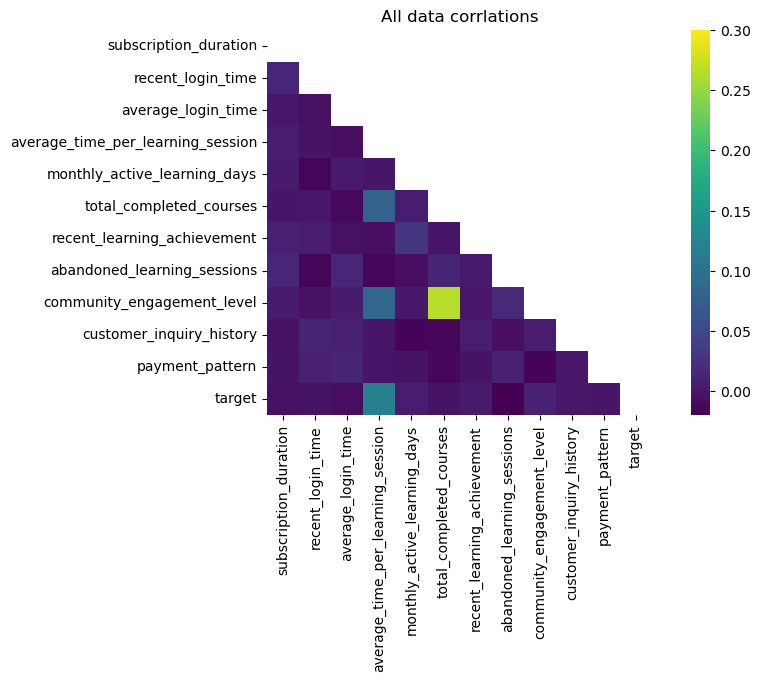

In [24]:
mini_csv = pd.read_csv("C:\workspace\python\data/data/mini.csv")

subscription_duration = mini_csv["subscription_duration"]
abandoned_learning_sessions = mini_csv["abandoned_learning_sessions"]
mini_csv = mini_csv.drop(["user_id","preferred_difficulty_level","subscription_type"],axis=1)

mini_csv.corr()

corr = mini_csv.corr()
# create a mask to pass it to seaborn and only show half of the cells
# because corr between x and y is the same as the y and x
# it's only for estetic reasons
mask = np.zeros_like(corr) # 0행렬을 만든다.
mask[np.triu_indices_from(mask)] = True # upper triangle 부분을 true로 바꾼다.

# ----------------------------------------------------------------------------------------------------
# instanciate the figure
fig = plt.figure(figsize = (10, 5))

# plot the data using seaborn
ax = sns.heatmap(corr,
                 mask = mask,
                 vmax = 0.3,
                 square = True,
                 cmap = "viridis")
# set the title for the figure
ax.set_title("All data corrlations");

In [ ]:
# 총 강의 완료 수와 커뮤니티 참여도와의 상관관계 
# 평균 학습 세션 시간과 타겟과 유의미한 관계 포착